In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','Message'])

In [5]:
df['length'] = df['Message'].apply(len)

In [6]:
df.head()

,label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482902  58.442635   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1E7EA0F28>,
      dtype=object)

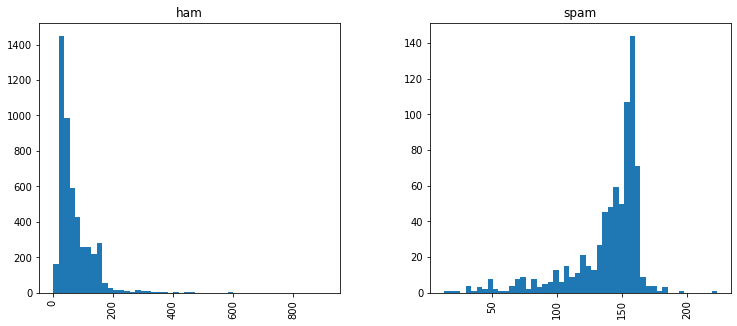

In [7]:
df.hist(column='length',by='label',bins=50,figsize=(12,5))

# So the ham is close to 0-100 and spam is close to 120-180

In [23]:
ps = WordNetLemmatizer()

In [24]:
corps = []
for i in range(0,len(df)):
    review = nltk.word_tokenize(re.sub('[^a-zA-Z]',' ',df['Message'][i]).lower())
    review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corps.append(review)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corps).toarray()

In [27]:
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[947  10]
 [  8 150]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       957
           1       0.94      0.95      0.94       158

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# So we have about 98% accuracy on unseen data